In [16]:
# Esta IA utiliza a rede neural chamada Long Short Term Memory para prever as ações de fechamento de uma empresa usando o preço das açõs dos ultimos 60 dias. 

In [17]:
import imp
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [18]:
#obtendo a cotação de ações
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-10-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880667
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860236
...,...,...,...,...,...,...
2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
2022-09-28,150.639999,144.839996,147.639999,149.839996,146691400.0,149.839996


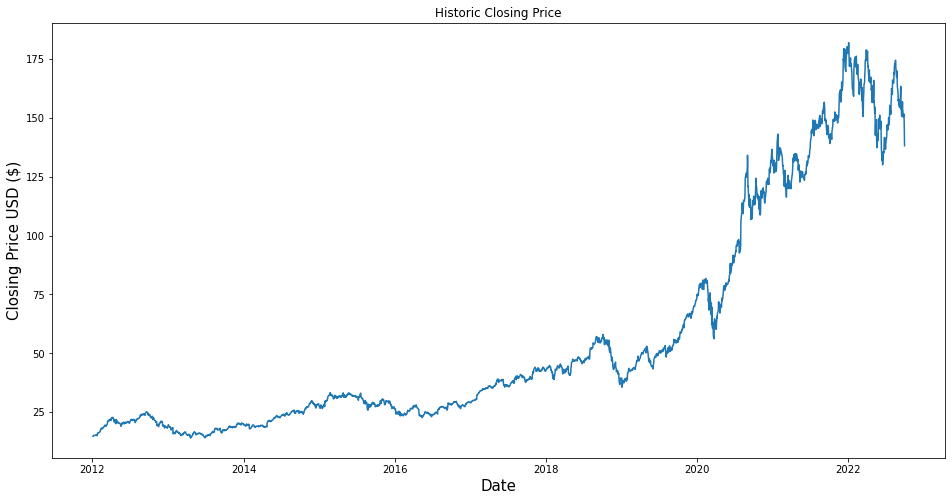

In [41]:
#Visualizando o histórico de preços de fechamento
plt.figure(figsize=(16,8))
plt.title('Historic Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Closing Price USD ($)', fontsize=15)
plt.show()

In [20]:
#criando um novo dataframe apenas oom a coluna de fechamento
data = df.filter(['Close'])
#convertendo o dataframe para um array numpy
dataset = data.values
#Pegando o numero de linhas para treinat o modelo IA
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2164

In [21]:
#Escalando os dados 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80858312],
       [0.76478988],
       [0.73932317]])

In [22]:
#criando um dataset de treino
train_data = scaled_data[0:training_data_len, :]
#dividindo os dados em datasets x_train e y_train 
x_train = []
y_train = []

for i in range(60, len(train_data)):   #60 pois é os ultimos 60 disa de analise
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [23]:
#convertendo x_train e y_train em array numpy
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2104, 60, 1)

In [24]:
#Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Compilando o modelo 
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#Treinando o modelo 
model.fit(x_train, y_train, batch_size=1, epochs=1)

2104/2104 [==============================] - 109s 48ms/step - loss: 3.2067e-04


In [27]:
#criando um dataset para teste 
#array com valores escalados de 2104 até 2500
test_data = scaled_data[training_data_len - 60: , :]
#criando os dataset x_test e y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [28]:
#convertendo os dados em numpy
x_test = np.array(x_test)

In [29]:
#remodelando os dados
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#prevendo os valores
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 4s 35ms/step


In [31]:
#obtendo o erro quadratico medio (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.211683516581706

C:\Users\mathe\AppData\Local\Temp/ipykernel_2124/3126287769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


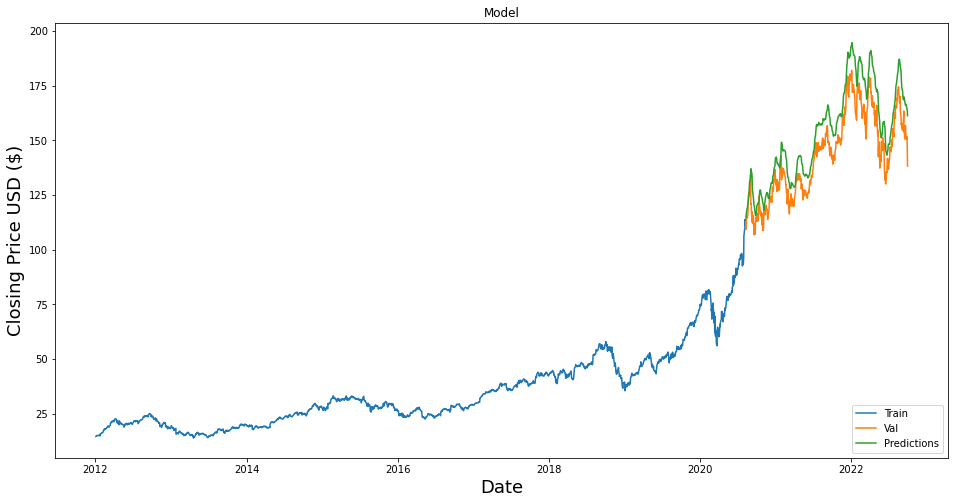

In [40]:
#grafico dos dados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualizando os dados
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [42]:
#valores do fechamento real e da previsao
valid

,Close,Predictions
Date,,
2020-08-10,112.727501,114.604782
2020-08-11,109.375000,116.110588
2020-08-12,113.010002,116.610359
2020-08-13,115.010002,117.328270
2020-08-14,114.907501,118.347076
...,...,...
2022-09-26,150.770004,165.219101
2022-09-27,151.759995,164.418671
2022-09-28,149.839996,163.946518
